In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

In [2]:
df = pd.read_csv("C:/Users/chira/Desktop/sakshisampledatasaet/iris_flowers.csv")

In [4]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,iris_setosa
1,4.9,3.0,1.4,0.2,iris_setosa
2,4.7,3.2,1.3,0.2,iris_setosa
3,4.6,3.1,1.5,0.2,iris_setosa
4,5.0,3.6,1.4,0.2,iris_setosa
5,5.4,3.9,1.7,0.4,iris_setosa
6,4.6,3.4,1.4,0.3,iris_setosa
7,5.0,3.4,1.5,0.2,iris_setosa
8,4.4,2.9,1.4,0.2,iris_setosa
9,4.9,3.1,1.5,0.1,iris_setosa


In [5]:
df.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,class
140,6.7,3.1,5.6,2.4,iris_virginica
141,6.9,3.1,5.1,2.3,iris_virginica
142,5.8,2.7,5.1,1.9,iris_virginica
143,6.8,3.2,5.9,2.3,iris_virginica
144,6.7,3.3,5.7,2.5,iris_virginica
145,6.7,3.0,5.2,2.3,iris_virginica
146,6.3,2.5,5.0,1.9,iris_virginica
147,6.5,3.0,5.2,2.0,iris_virginica
148,6.2,3.4,5.4,2.3,iris_virginica
149,5.9,3.0,5.1,1.8,iris_virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3    petal_width  150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.shape

(150, 5)

In [9]:
df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [11]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
 petal_width    0
class           0
dtype: int64

In [12]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', ' petal_width', 'class'], dtype='object')

In [16]:
df['class'].value_counts()

iris_setosa        50
iris_versicolor    50
iris_virginica     50
Name: class, dtype: int64

C:\Users\chira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


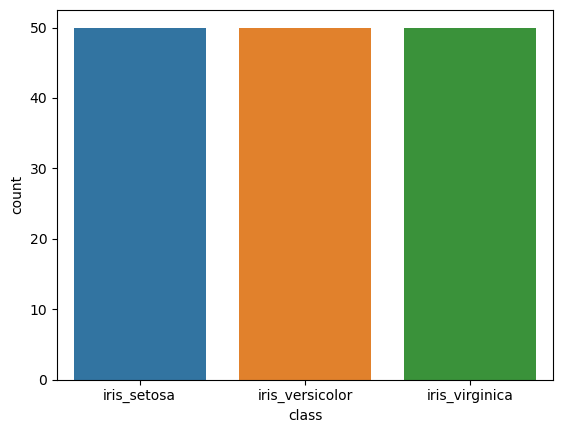

In [17]:
sns.countplot(df['class']);

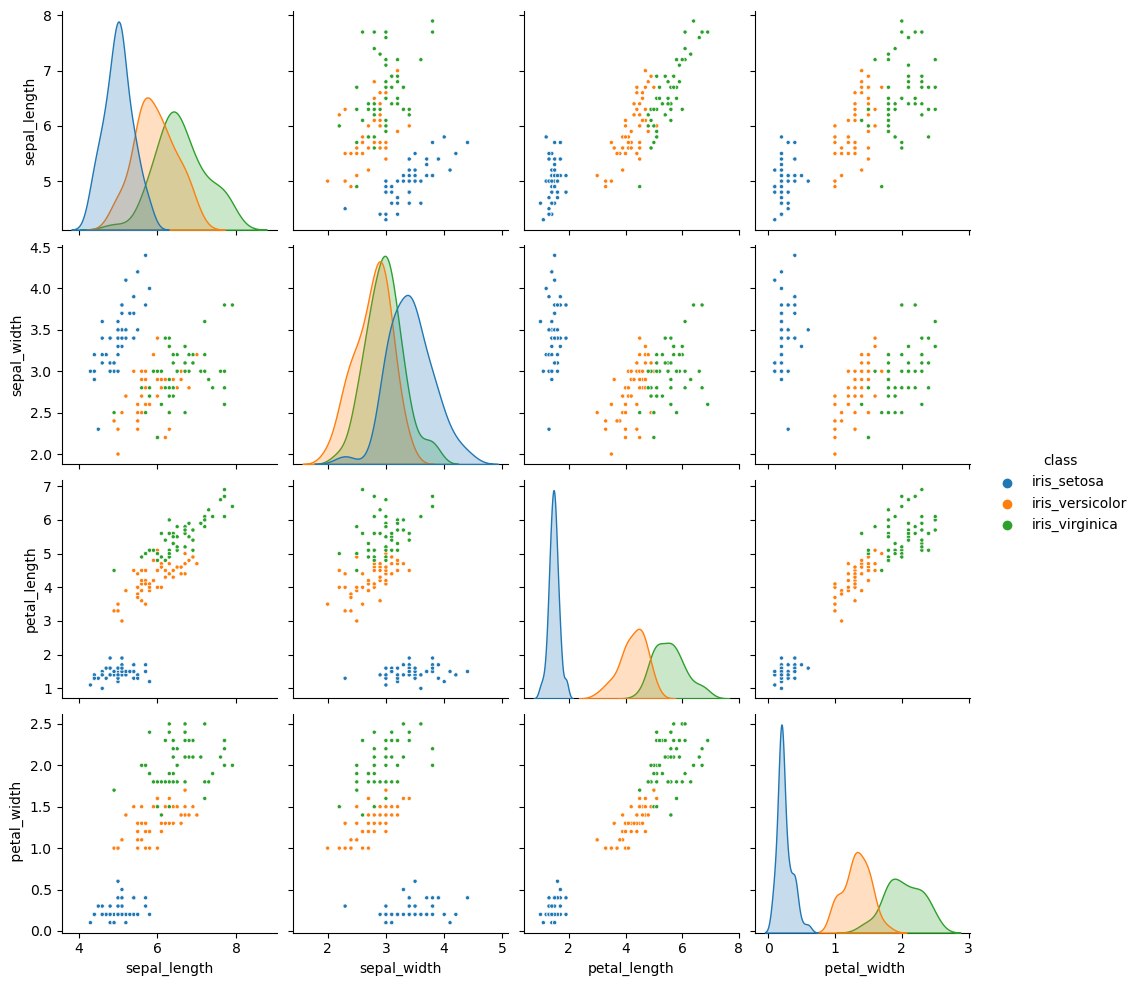

In [18]:
sns.pairplot(df,hue='class',markers='.')

In [22]:
X = df.drop(['class'], axis=1)
y = df['class']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (150, 4) | y shape: (150,) 


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
X_train.shape

(120, 4)

In [25]:
y_train.shape

(120,)

In [26]:
X_test.shape

(30, 4)

In [27]:
y_test.shape

(30,)

In [28]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()
logistic_model.fit(X_train,y_train)
y_pred=logistic_model.predict(X_test)

In [29]:
y_pred

array(['iris_virginica', 'iris_versicolor', 'iris_setosa',
       'iris_versicolor', 'iris_setosa', 'iris_virginica', 'iris_setosa',
       'iris_virginica', 'iris_virginica', 'iris_versicolor',
       'iris_versicolor', 'iris_setosa', 'iris_setosa', 'iris_virginica',
       'iris_virginica', 'iris_virginica', 'iris_versicolor',
       'iris_setosa', 'iris_virginica', 'iris_versicolor',
       'iris_virginica', 'iris_setosa', 'iris_setosa', 'iris_virginica',
       'iris_virginica', 'iris_setosa', 'iris_virginica',
       'iris_virginica', 'iris_versicolor', 'iris_versicolor'],
      dtype=object)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 9,  0,  0],
       [ 0,  6,  0],
       [ 0,  2, 13]], dtype=int64)

In [31]:
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 93.33
